In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

<h4>Load the dataset

In [2]:
data = pd.read_csv("USA_Housing.csv")
df = data.copy()
df.head(10) 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [3]:
df.shape

(5000, 7)

In [4]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

<h3>Exploratory data analysis

<Axes: >

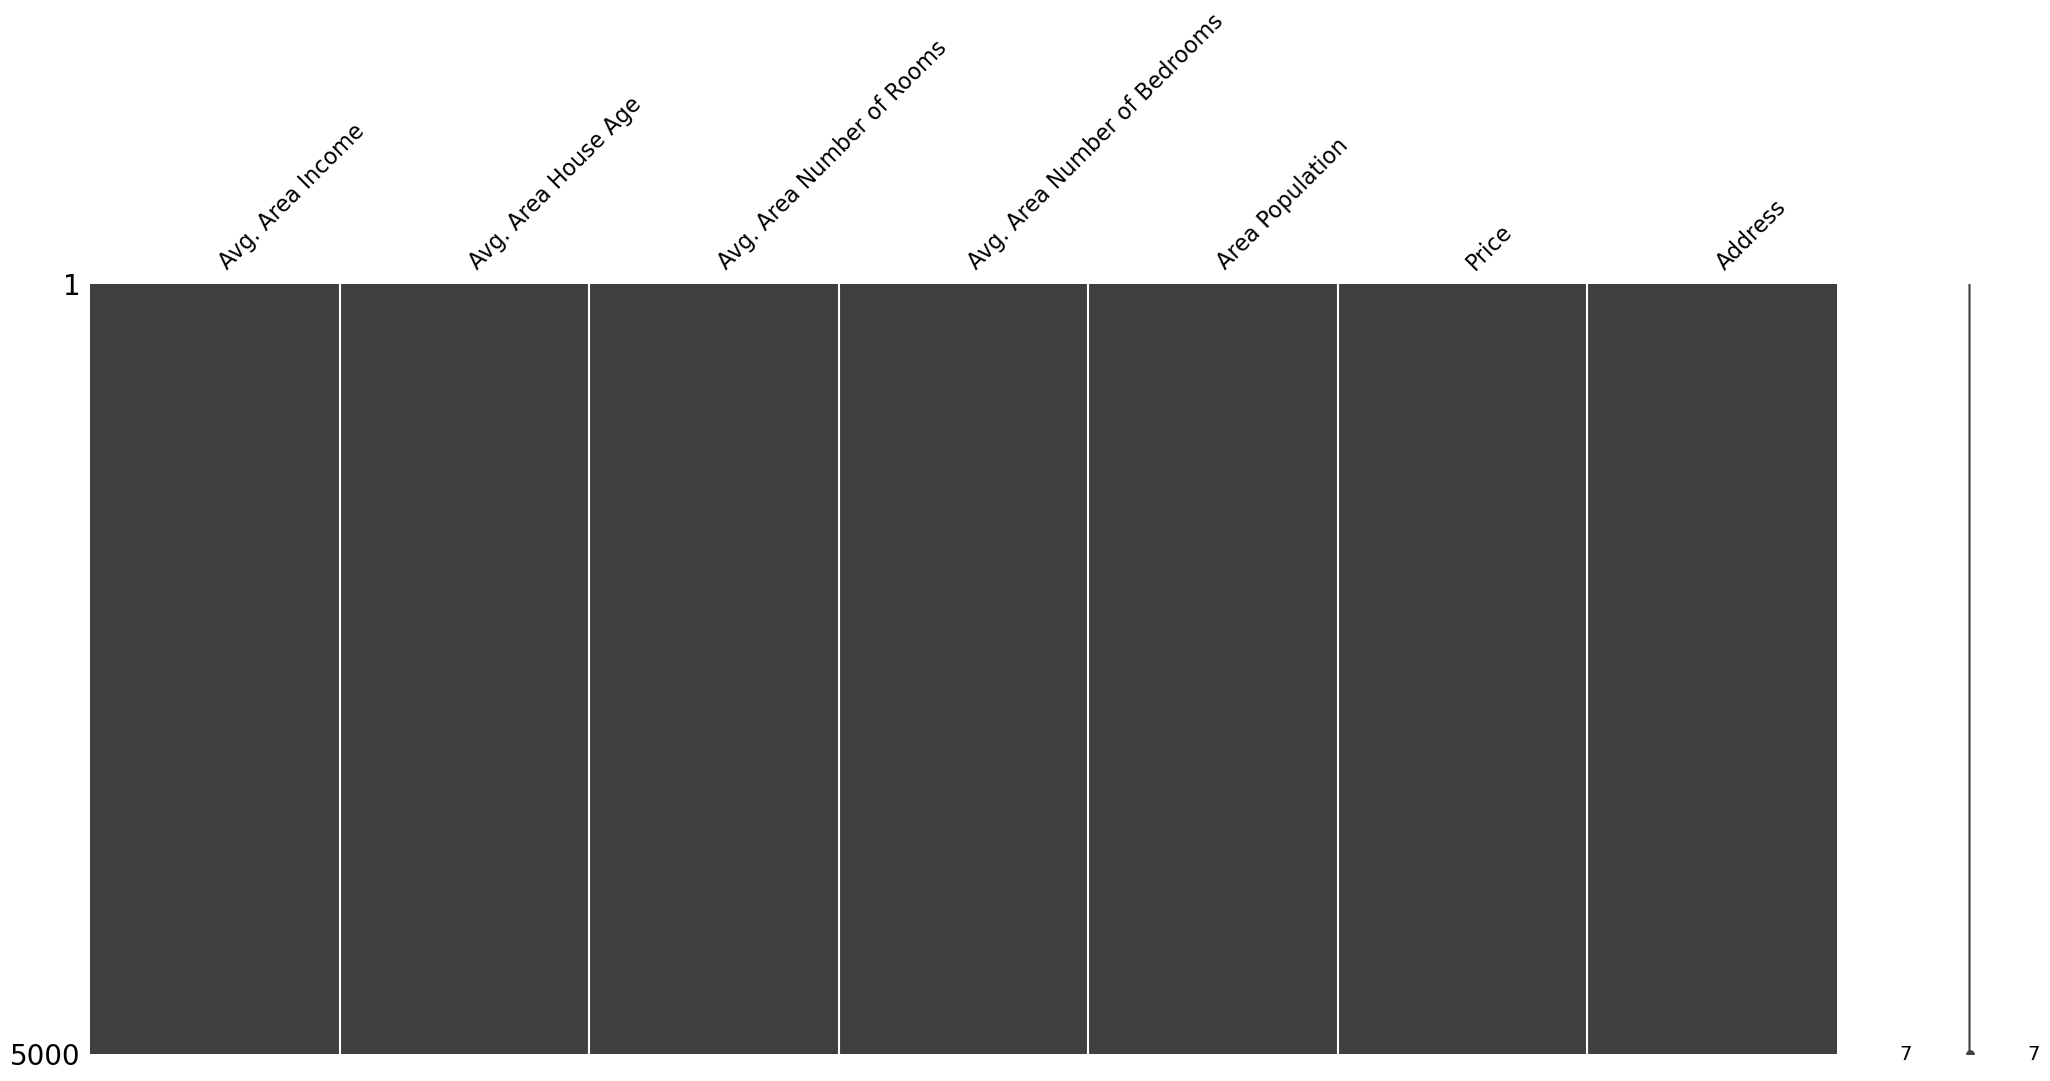

In [5]:
import missingno as msno 
msno.matrix(df)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2848\29121331.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

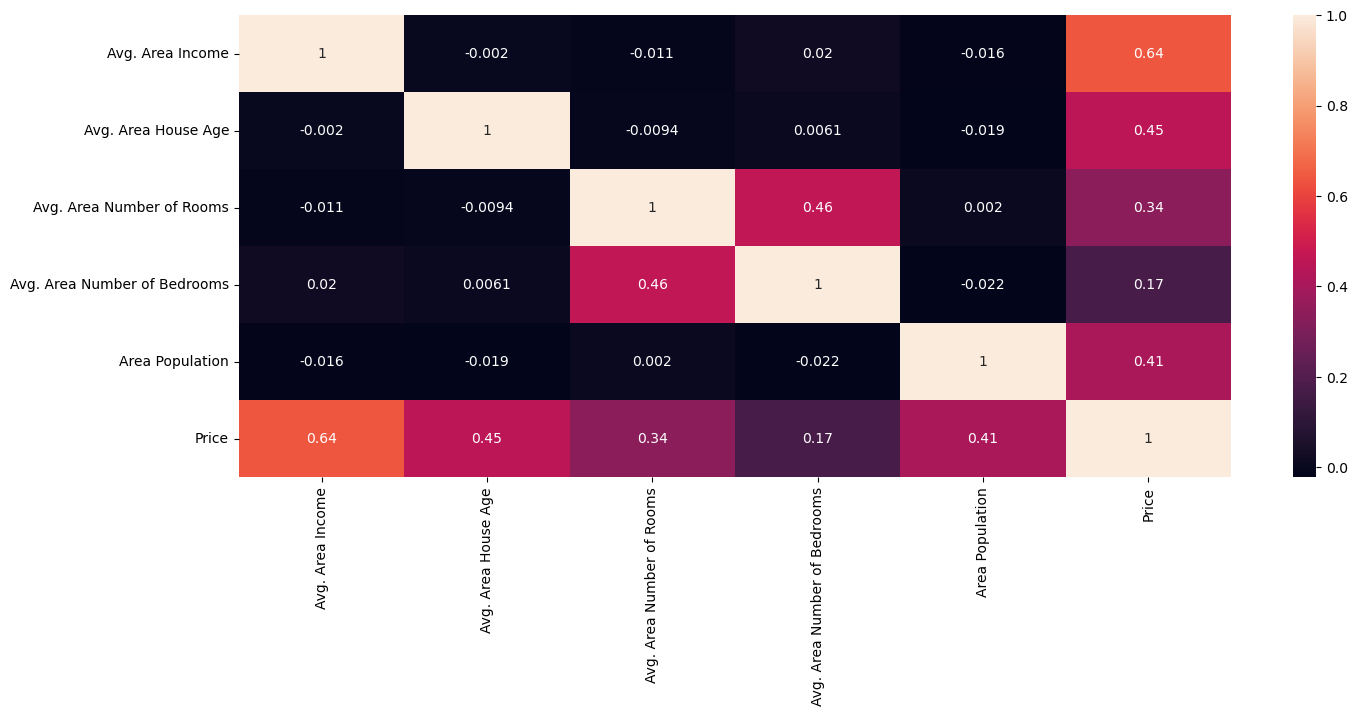

In [6]:
import seaborn as sns 
plt.figure(figsize=[16,6])
sns.heatmap(df.corr(),annot=True)

In [7]:
df.drop("Address",axis=1,inplace=True)


In [8]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06


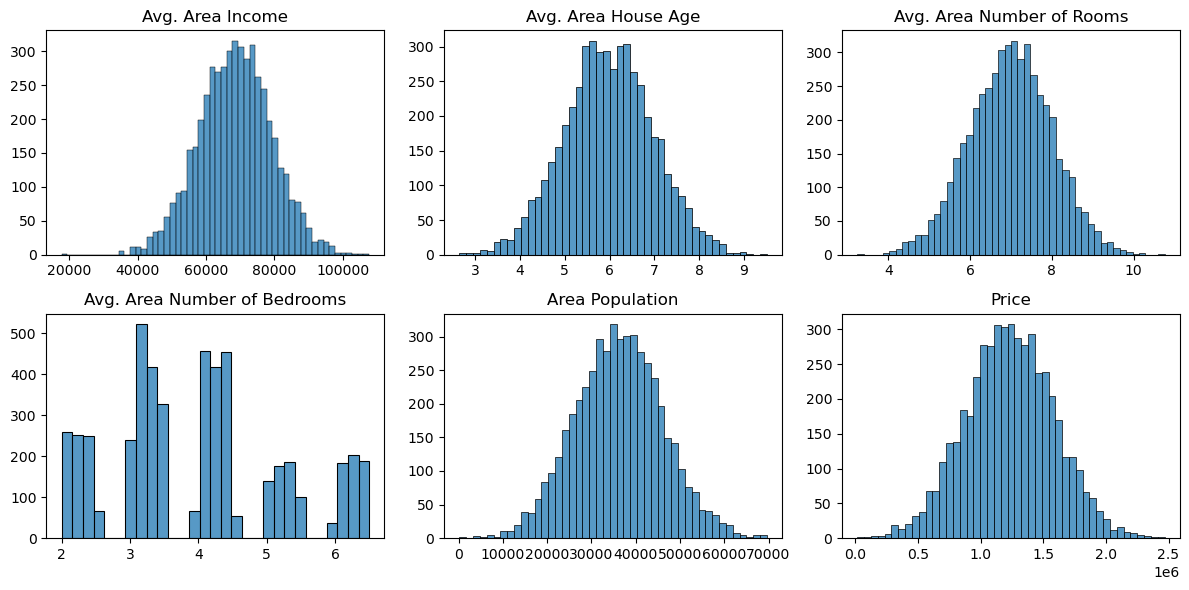

In [9]:
numeric_cols = df.columns

plt.figure(figsize=[12,6])

for i, col in enumerate(numeric_cols):
  ax = plt.subplot(2,3, i + 1)
  sns.histplot(df[col],ax=ax).set(title=col,ylabel="",xlabel="")
  plt.tight_layout()
     

In [10]:
X = df.drop(["Price"],axis=1)
y = df["Price"] 

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100,shuffle=True)

<h3>Modeling

In [12]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
lin_model

LinearRegression()

In [13]:
y_pred = lin_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"R2 score: {round(r2,2)}")
print(f"Mean absolute percentage error: {round(mape,2)}")
print(f"Root mean squared error: {round(rmse)}")


R2 score: 0.92
Mean absolute percentage error: 0.08
Root mean squared error: 101815


In [14]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [15]:
y_pred = xgb.predict(X_test)

In [16]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"R2 score: {round(r2,2)}")
print(f"Mean absolute percentage error: {round(mape,2)}")
print(f"Root mean squared error: {round(rmse)}")

R2 score: 0.88
Mean absolute percentage error: 0.09
Root mean squared error: 122182


In [17]:
import pickle

In [20]:
filename = 'trained_model.sav'
pickle.dump(lin_model,open(filename,'wb'))

In [19]:
loaded_model = pickle.load(open('trained_model.sav','rb'))